In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('data/S&PDataset_final.csv')
df.shape

(11553, 26)

In [41]:
row_count_per_gvkey = df['GVKEY'].value_counts()
row_count_per_gvkey

GVKEY
14282    26
13824    26
11506    26
11465    26
11456    26
         ..
36191     4
37460     4
40614     2
43197     1
41818     1
Name: count, Length: 497, dtype: int64

In [42]:
companies_to_drop = row_count_per_gvkey[row_count_per_gvkey < 25].index
companies_to_drop

Index([  3851,  62689,   5568,  28877, 126136, 137131, 126554, 141459, 139665,
       138743,
       ...
        34636,  34443,  35077,  35168,  36190,  36191,  37460,  40614,  43197,
        41818],
      dtype='int64', name='GVKEY', length=137)

In [43]:
df = df[~df['GVKEY'].isin(companies_to_drop)]

In [44]:
df['conm'].nunique()

360

In [45]:
df.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco          418
act         1814
aqc          938
at             0
capx         153
ceq            0
dt          1445
ebit           0
icapt          1
lct         1801
ni             0
revt           0
seq            0
xrd         3946
xrdp        3966
costat         0
sic            0
dtype: int64

In [46]:
# Counting total financial companies

rows_with_sic_starting_6 = df[df['sic'].astype(str).str.startswith('6')]
grouped_by_gvkey = rows_with_sic_starting_6.groupby('GVKEY')
unique_gvkeys = grouped_by_gvkey.groups.keys()
len(unique_gvkeys)


69

In [47]:
# # Counting financial companies that have incomplete data

# # filtered_df = df[~df['fyear'].between(1999, 2022)]
# filtered_df_starting_6 = df[df['sic'].astype(str).str.startswith('6')]
# grouped_by_gvkey = filtered_df_starting_6.groupby('GVKEY')
# unique_gvkeys_starting_6 = grouped_by_gvkey.groups.keys()
# len(unique_gvkeys_starting_6)

In [48]:
# Dropping all companies that have incomplete data and financial companies

# df_within_year_range = df[df['fyear'].between(1999, 2022)]
df_no_sic_starting_6 = df[~df['sic'].astype(str).str.startswith('6')]

In [49]:
df_no_sic_starting_6['GVKEY'].nunique()

291

In [50]:
df_no_sic_starting_6['GVKEY'].value_counts()

GVKEY
8543      26
63172     26
10247     26
10407     26
10453     26
          ..
15855     25
16721     25
25313     25
27965     25
126721    25
Name: count, Length: 291, dtype: int64

In [51]:
print("Shape: ", df_no_sic_starting_6.shape)
print("Total remaining companies: ", df_no_sic_starting_6['conm'].nunique())

Shape:  (7523, 26)
Total remaining companies:  291


In [52]:
df_no_sic_starting_6.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            2
act          295
aqc          751
at             0
capx          33
ceq            0
dt           987
ebit           0
icapt          1
lct          282
ni             0
revt           0
seq            0
xrd         2701
xrdp        2720
costat         0
sic            0
dtype: int64

In [53]:
df_no_sic_starting_6['GVKEY'].value_counts()

GVKEY
8543      26
63172     26
10247     26
10407     26
10453     26
          ..
15855     25
16721     25
25313     25
27965     25
126721    25
Name: count, Length: 291, dtype: int64

In [54]:
# Counting the unique companies that have missing values for total current assets and liabilities

grouped_by_gvkey = df_no_sic_starting_6.groupby('GVKEY')

missing_act = grouped_by_gvkey['act'].apply(lambda x: x.isnull().sum())
missing_lct = grouped_by_gvkey['lct'].apply(lambda x: x.isnull().sum())

missing_companies = []
lct_act = 8543
for gvkey, count in missing_act.items():
    if count != 0 and count > 2:
        missing_companies.append(gvkey)

print(("{total} companies with missing act and lct values: {list}").format(total = len(missing_companies), list = missing_companies))
print(lct_act)

14 companies with missing act and lct values: [2176, 3835, 4839, 5047, 5073, 6669, 8253, 8823, 10519, 11456, 12459, 12635, 25340, 66065]
8543


In [55]:
df_no_sic_starting_6[df_no_sic_starting_6['GVKEY'] == lct_act]['act']

4514        NaN
4515        NaN
4516    17238.0
4517    17275.0
4518    17441.0
4519    21382.0
4520    25901.0
4521    25781.0
4522    26152.0
4523    22890.0
4524    11076.0
4525     5773.0
4526     5981.0
4527     7131.0
4528     6315.0
4529     6590.0
4530     6878.0
4531     6086.0
4532     7260.0
4533     4344.0
4534     4299.0
4535     4824.0
4536     7117.0
4537     6083.0
4538     7220.0
4539     5585.0
Name: act, dtype: float64

In [56]:
missing_act

GVKEY
1045      0
1075      0
1078      0
1161      0
1209      0
         ..
119314    0
121077    0
121718    0
125595    0
126721    0
Name: act, Length: 291, dtype: int64

In [57]:
missing_companies

[2176,
 3835,
 4839,
 5047,
 5073,
 6669,
 8253,
 8823,
 10519,
 11456,
 12459,
 12635,
 25340,
 66065]

In [58]:
lct_act

8543

In [59]:
df_no_sic_starting_6['GVKEY'].nunique()

291

In [60]:
# Dropping companies with no act or lct values
df_final = df_no_sic_starting_6[~df_no_sic_starting_6['GVKEY'].isin(missing_companies)]
df_final['GVKEY'].nunique()

277

In [61]:
# Substituing null values for aqcuisitions to 0

df_final['aqc'].fillna(0, inplace=True)

In [62]:
# Dropping 'total debt'

df_final = df_final.drop(columns=['dt'])
df_final.columns

Index(['GVKEY', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'conm', 'curcd', 'aco', 'act', 'aqc', 'at', 'capx', 'ceq', 'ebit',
       'icapt', 'lct', 'ni', 'revt', 'seq', 'xrd', 'xrdp', 'costat', 'sic'],
      dtype='object')

In [63]:
df_final.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            2
act            2
aqc            0
at             0
capx          30
ceq            0
ebit           0
icapt          1
lct            2
ni             0
revt           0
seq            0
xrd         2532
xrdp        2551
costat         0
sic            0
dtype: int64

In [64]:
df_final[df_final['fyear'] == 2023]

,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,aco,...,ebit,icapt,lct,ni,revt,seq,xrd,xrdp,costat,sic
24,1045,31/12/2023,2023,INDL,C,D,STD,AMERICAN AIRLINES GROUP INC,USD,658.000,...,4013.000,30520.000,22062.000,822.000,52788.000,-5202.000,NaN,NaN,A,4512
75,1078,31/12/2023,2023,INDL,C,D,STD,ABBOTT LABORATORIES,USD,2256.000,...,6793.000,53375.000,13841.000,5723.000,40109.000,38603.000,2741.000,2888.000,A,3845
101,1161,31/12/2023,2023,INDL,C,D,STD,ADVANCED MICRO DEVICES,USD,1259.000,...,629.000,58144.000,6689.000,854.000,22680.000,55892.000,5872.000,5005.000,A,3674
127,1209,30/09/2023,2023,INDL,C,D,STD,AIR PRODUCTS & CHEMICALS INC,USD,436.800,...,2704.400,25722.700,3895.800,2300.200,12600.000,14312.900,105.600,102.900,A,2810
153,1300,31/12/2023,2023,INDL,C,D,STD,HONEYWELL INTERNATIONAL INC,USD,1462.000,...,7084.000,33900.000,18539.000,5658.000,36662.000,15856.000,1456.000,1478.000,A,9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9686,119314,31/12/2023,2023,INDL,C,D,STD,BOOKING HOLDINGS INC,USD,1070.000,...,6793.000,10112.000,13330.000,4289.000,21365.000,-2744.000,NaN,NaN,A,4700
9711,121077,30/09/2023,2023,INDL,C,D,STD,F5 INC,USD,180.631,...,559.618,3039.797,1472.781,394.948,2813.169,2800.232,540.285,543.368,A,7373
9761,121718,31/12/2023,2023,INDL,C,D,STD,JUNIPER NETWORKS INC,USD,572.600,...,568.800,6192.400,2104.000,310.200,5564.500,4492.700,1144.400,1036.100,A,3576
9811,125595,31/12/2023,2023,INDL,C,D,STD,AKAMAI TECHNOLOGIES INC,USD,216.114,...,706.497,8910.190,836.038,547.629,3811.920,4597.155,406.048,391.434,A,7370


In [65]:
df_final = df_final[df_final['fyear'] != 1998]

In [66]:
df_final = df_final[df_final['fyear'] != 2023]

In [67]:
df_final = df_final[df_final['GVKEY'] != 1045]

In [68]:
df_final['GVKEY'].value_counts()

GVKEY
1075      24
12540     24
14225     24
13824     24
13714     24
          ..
6730      24
6733      24
6774      24
6829      24
126721    24
Name: count, Length: 276, dtype: int64

In [69]:
# df_final.to_csv('final_dataset.csv')

In [70]:
df_final.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            0
act            1
aqc            0
at             0
capx          22
ceq            0
ebit           0
icapt          0
lct            1
ni             0
revt           0
seq            0
xrd         2322
xrdp        2339
costat         0
sic            0
dtype: int64

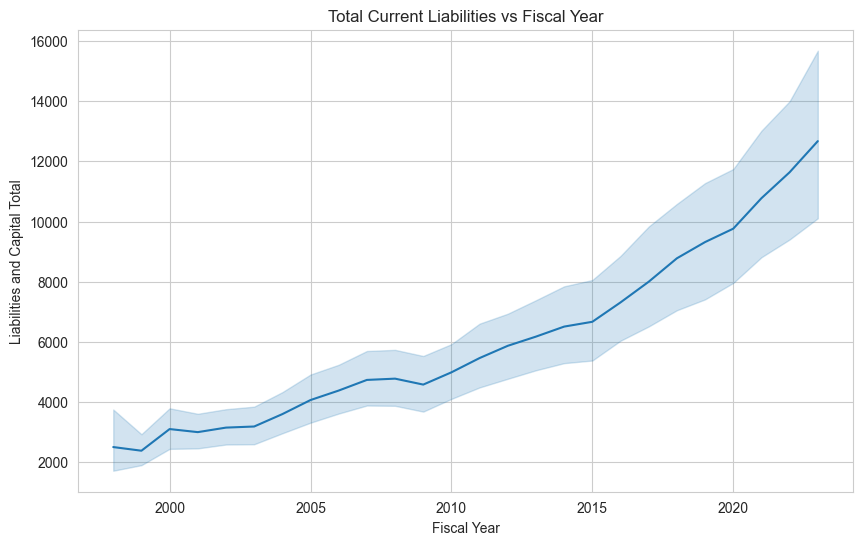

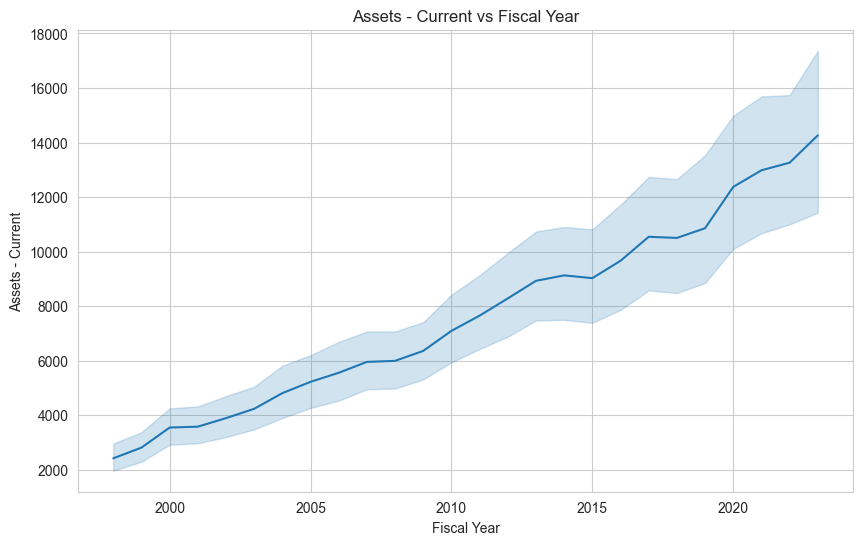

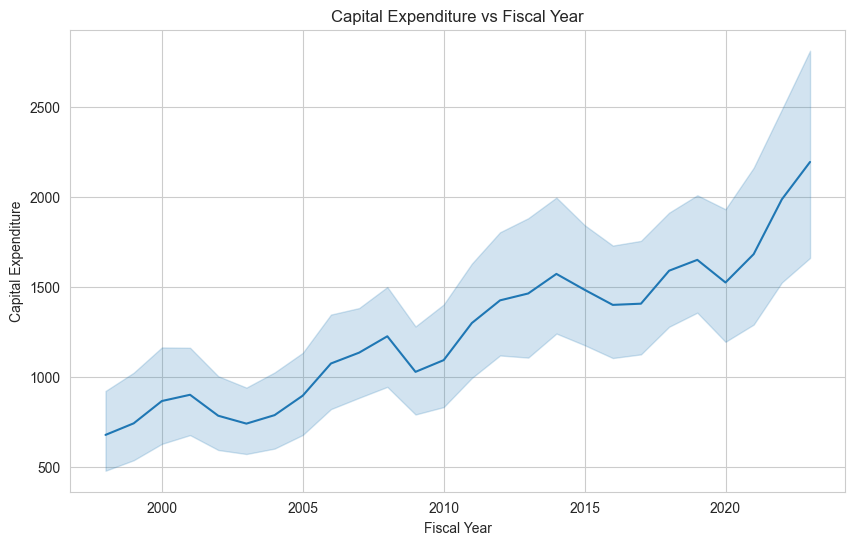

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Plot lct vs fyear
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='fyear', y='lct')
plt.title('Total Current Liabilities vs Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Liabilities and Capital Total')
plt.show()

# Plot act vs fyear
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='fyear', y='act')
plt.title('Assets - Current vs Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Assets - Current')
plt.show()

# Plot capx vs fyear
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='fyear', y='capx')
plt.title('Capital Expenditure vs Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Capital Expenditure')
plt.show()

In [72]:
from sklearn.impute import KNNImputer

# Select columns with missing values
cols_with_missing = ['capx', 'act', 'lct']

# Initialize KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Group the DataFrame by 'GVKEY'
grouped = df_final.groupby('GVKEY')

# Impute missing values for each group separately
for name, group in grouped:
    # Impute missing values for the current group
    group[cols_with_missing] = imputer.fit_transform(group[cols_with_missing])
    # Update the imputed values in the main DataFrame
    df_final.loc[group.index, cols_with_missing] = group[cols_with_missing]

# Print the DataFrame to verify the imputed values
print(df_final)

       GVKEY    datadate  fyear indfmt consol popsrc datafmt  \
26      1075  31/12/1999   1999   INDL      C      D     STD   
27      1075  31/12/2000   2000   INDL      C      D     STD   
28      1075  31/12/2001   2001   INDL      C      D     STD   
29      1075  31/12/2002   2002   INDL      C      D     STD   
30      1075  31/12/2003   2003   INDL      C      D     STD   
...      ...         ...    ...    ...    ...    ...     ...   
9901  126721  31/12/2018   2018   INDL      C      D     STD   
9902  126721  31/12/2019   2019   INDL      C      D     STD   
9903  126721  31/12/2020   2020   INDL      C      D     STD   
9904  126721  31/12/2021   2021   INDL      C      D     STD   
9905  126721  31/12/2022   2022   INDL      C      D     STD   

                            conm curcd      aco  ...     ebit      icapt  \
26    PINNACLE WEST CAPITAL CORP   USD   68.725  ...  578.777   4411.785   
27    PINNACLE WEST CAPITAL CORP   USD  103.791  ...  675.971   4337.797   
28 

In [73]:
# missing_capx = df_final[df_final['capx'].isnull()].groupby('GVKEY').size()
# missing_capx

In [74]:
df_final.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            0
act            0
aqc            0
at             0
capx           0
ceq            0
ebit           0
icapt          0
lct            0
ni             0
revt           0
seq            0
xrd         2322
xrdp        2339
costat         0
sic            0
dtype: int64

In [75]:
df = df_final

# Calculate y = capx/at
df['y'] = df['capx'] / df['at']

# Calculate liquidity = act/lct
df['liquidity'] = df['act'] / df['lct']

# Calculate leverage = lct/ceq
df['leverage'] = df['lct'] / df['ceq']

# Assign size = at
df['size'] = df['at']

# Calculate roa = ni/at
df['roa'] = df['ni'] / df['at']

df['prev_inv'] = df['y'].shift(-1)

df['prev_year_at'] = df['at'].shift(1)

# Calculate the growth rate
df['asset_growth'] = df['at'] / df['prev_year_at']

# Drop the 'prev_year_at' column if not needed anymore
df.drop(columns=['prev_year_at'], inplace=True)

In [77]:
# adding cpu 
# Assuming df_cpu1 is your DataFrame containing the dataset
df_cpu1 = pd.read_csv('data/CPU index.csv')
# Convert 'date' column to datetime format with custom date parser
df_cpu1['date'] = pd.to_datetime(df_cpu1['date'], format='%b-%y')

# Extract year from 'date' column
df_cpu1['year'] = df_cpu1['date'].dt.year

# Drop the 'old_cpu_index' column
df_cpu1.drop(columns='old_cpu_index', inplace=True)

# Group by year and compute average cpu_index
average_cpu_index = df_cpu1.groupby('year')['cpu_index'].mean().reset_index()

# Verify the result
print(average_cpu_index)

    year   cpu_index
0   1987   59.666897
1   1988   65.722413
2   1989   76.697151
3   1990   94.779705
4   1991   80.746618
5   1992   88.297105
6   1993   78.883753
7   1994   70.176454
8   1995   83.972636
9   1996   66.936481
10  1997   60.388895
11  1998   57.564906
12  1999   58.748100
13  2000   62.448747
14  2001   93.647460
15  2002   88.280674
16  2003   67.846581
17  2004   65.208485
18  2005   66.038375
19  2006   67.521463
20  2007  107.765643
21  2008   97.135520
22  2009   99.128977
23  2010  112.572259
24  2011  114.578606
25  2012  100.094996
26  2013   77.565805
27  2014   83.167437
28  2015   92.614515
29  2016  120.715749
30  2017  169.765549
31  2018  143.290591
32  2019  192.001778
33  2020  218.634176
34  2021  215.384017
35  2022  225.413245
36  2023  221.172666


In [78]:
combined_data = pd.merge(df, average_cpu_index, left_on='fyear', right_on='year', how='inner')
combined_data["GVKEY"].value_counts()

GVKEY
1075      24
12540     24
14225     24
13824     24
13714     24
          ..
6730      24
6733      24
6774      24
6829      24
126721    24
Name: count, Length: 276, dtype: int64

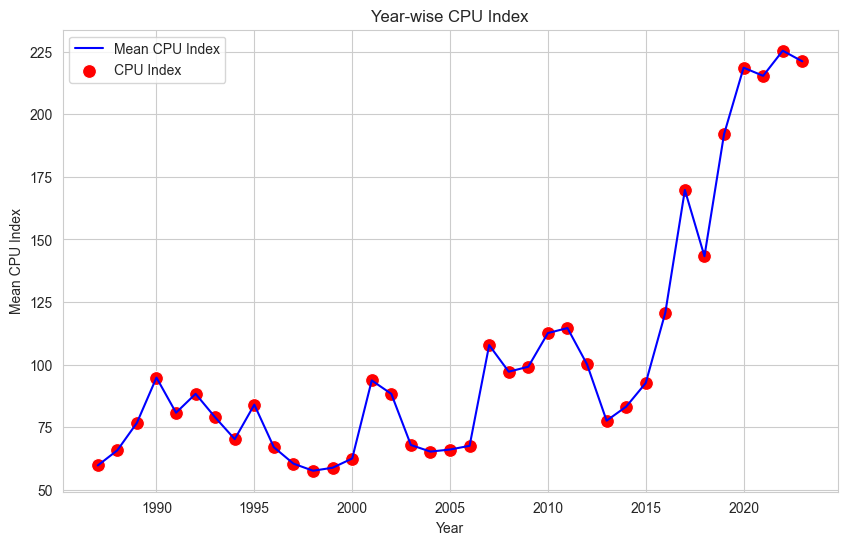

In [79]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_cpu_index, x='year', y='cpu_index', color='blue', label='Mean CPU Index')
sns.scatterplot(data=average_cpu_index, x='year', y='cpu_index', color='red', s=100, label='CPU Index')
plt.xlabel('Year')
plt.ylabel('Mean CPU Index')
plt.title('Year-wise CPU Index')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
combined_data.to_csv('data/imputed_dataset.csv')